<a href="https://colab.research.google.com/github/1-suresh/solar_power_prediction_model/blob/main/solar_power_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### created using colab

# Solar power preditction model


#Importing libraries


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Load dataset
data_url = 'https://raw.githubusercontent.com/anantgupta129/Solar-Power-Generation-Forecasting/refs/heads/main/solarpowergeneration.csv'
data = pd.read_csv(data_url)
data.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


# Splitting features and target

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)
print(X.shape, y.shape)


(4213, 20) (4213, 1)


# Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (3159, 20)
Shape of X_test: (1054, 20)
Shape of y_train: (3159, 1)
Shape of y_test: (1054, 1)


In [ ]:
print("First 5 samples of X_train:\n", X_train[:5])
print("\n")
print("First 5 samples of y_train:\n", y_train[:5])

First 5 samples of X_train:
 [[  13.75       36.       1021.6         0.          0.         82.
     0.         82.          0.        428.98       29.6       184.18
    34.75      185.95       29.6       184.18       33.12       19.806907
    64.26402   183.76834 ]
 [   6.62       81.       1018.7         0.          0.        100.
     0.         10.        100.          4.45       25.35      191.47
    33.53      194.93       26.12      191.93       26.28       56.782341
    82.089942  130.04371 ]
 [  15.04       46.       1009.4         0.          0.        100.
     0.        100.         10.        354.22       17.77      186.98
    19.25      187.52       17.41      187.13       23.76       30.193473
    20.435975  147.01697 ]
 [  -2.04       89.       1017.6         0.          0.        100.
     0.          0.        100.        155.75       45.36      312.43
    49.9       313.83       44.83      313.05       54.         32.469073
    64.406196  147.60095 ]
 [  25.74      

#  Scaling inputs and outputs

In [ ]:
# StandardScaler for X
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
print("Scaled X_train:\n", X_train)

X_test = sc_X.transform(X_test)
# print("Scaled X_test:\n", X_test)

# StandardScaler for y
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
# print("Scaled y_train:\n", y_train)

y_test = sc_y.transform(y_test)
# print("Scaled y_test:\n", y_test)


Scaled X_train:
 [[-0.15688663 -0.65066193  0.32458773 ... -1.17016507  0.20906612
   0.23973116]
 [-0.96299273  1.26236489 -0.09488224 ...  0.21285162  1.10270022
  -0.59126299]
 [-0.01104135 -0.22554486 -1.44007902 ... -0.78166945 -1.98808451
  -0.32872643]
 ...
 [ 0.08053592 -0.39559169 -0.65899702 ... -1.39867408 -1.07235309
  -0.0910784 ]
 [ 0.34283131 -0.90573217  0.59941288 ... -0.46582577  0.41541699
   0.76311909]
 [-0.6893915   0.62468928  1.45281728 ...  0.28508139  0.20437129
  -0.90996355]]


# Define neural network model

In [ ]:
def create_spfnet(n_layers, n_nodes, activation, dropout_rate, kernel_initializer):
    model = tf.keras.Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    for i in range(n_layers):
        model.add(Dense(n_nodes[i], activation=activation, kernel_initializer=kernel_initializer))
        model.add(Dropout(dropout_rate))

    model.add(Dense(1))
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model


#  Create the model

In [ ]:
spfnet = create_spfnet(n_layers=2, n_nodes=[64, 32], activation='relu', dropout_rate=0.2, kernel_initializer='he_normal')
spfnet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

# Early stopping

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model

In [ ]:
history = spfnet.fit(X_train, y_train, batch_size=32, validation_split=0.2, epochs=150, callbacks=[early_stopping], verbose=2)

Epoch 1/150
79/79 - 2s - 27ms/step - loss: 1.9180 - root_mean_squared_error: 1.3849 - val_loss: 0.5377 - val_root_mean_squared_error: 0.7333
Epoch 2/150
79/79 - 0s - 3ms/step - loss: 0.8878 - root_mean_squared_error: 0.9422 - val_loss: 0.4088 - val_root_mean_squared_error: 0.6394
Epoch 3/150
79/79 - 0s - 4ms/step - loss: 0.6564 - root_mean_squared_error: 0.8102 - val_loss: 0.3566 - val_root_mean_squared_error: 0.5972
Epoch 4/150
79/79 - 0s - 4ms/step - loss: 0.5551 - root_mean_squared_error: 0.7450 - val_loss: 0.3491 - val_root_mean_squared_error: 0.5909
Epoch 5/150
79/79 - 0s - 4ms/step - loss: 0.5093 - root_mean_squared_error: 0.7137 - val_loss: 0.3382 - val_root_mean_squared_error: 0.5816
Epoch 6/150
79/79 - 0s - 4ms/step - loss: 0.4459 - root_mean_squared_error: 0.6678 - val_loss: 0.3249 - val_root_mean_squared_error: 0.5700
Epoch 7/150
79/79 - 0s - 4ms/step - loss: 0.4129 - root_mean_squared_error: 0.6426 - val_loss: 0.3127 - val_root_mean_squared_error: 0.5592
Epoch 8/150
79/79 -

 # Plot training history

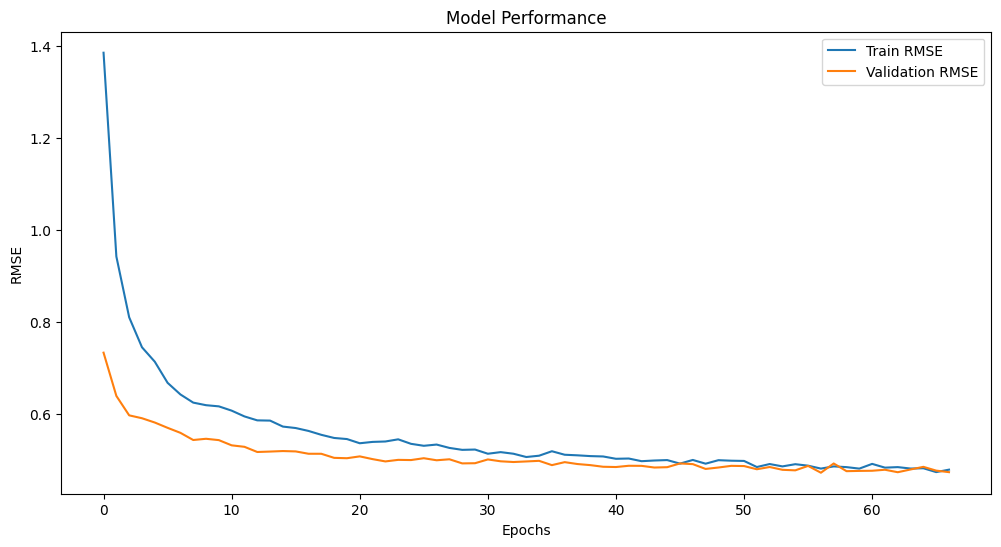

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['root_mean_squared_error'], label='Train RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('Model Performance')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Evaluate the model on test data

In [ ]:
test_loss, test_rmse = spfnet.evaluate(X_test, y_test, verbose=0)
print(f'Test RMSE: {test_rmse}')

Test RMSE: 0.4771019518375397


# Predictions

In [ ]:
train_pred = sc_y.inverse_transform(spfnet.predict(X_train))
test_pred = sc_y.inverse_transform(spfnet.predict(X_test))
y_train_orig = sc_y.inverse_transform(y_train)
y_test_orig = sc_y.inverse_transform(y_test)

99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


# Calculate metrics

In [ ]:
train_rmse = np.sqrt(mean_squared_error(y_train_orig, train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test_orig, test_pred))
train_r2 = r2_score(y_train_orig, train_pred)
test_r2 = r2_score(y_test_orig, test_pred)


In [ ]:
print(f'Training RMSE: {train_rmse}, R²: {train_r2}')
print(f'Test RMSE: {test_rmse}, R²: {test_r2}')

Training RMSE: 409.6067252645209, R²: 0.8080771987024942
Test RMSE: 446.08228373966995, R²: 0.7778083252782725


# Display test data predictions

In [ ]:
test_results = pd.DataFrame({
    'Actual Power': y_test_orig.flatten(),
    'Predicted Power': test_pred.flatten()
})
print(test_results.head(20))

    Actual Power  Predicted Power
0    2511.237500      2365.447754
1     480.205120       553.458740
2    2017.568700      1673.927002
3     760.140120       323.867828
4     220.395000       146.829498
5      25.226724       130.273407
6       0.056667      -180.963165
7    2497.532800      2322.812988
8     514.647220       425.361481
9     916.919160      1374.429443
10   1911.945100      1709.156860
11     35.146667       526.468567
12   2449.038100      2239.773682
13     38.837352       689.425659
14    823.411110      1855.828003
15   2274.646400      1951.778931
16   1123.399400      1336.649414
17    946.531670      1325.418701
18   1651.138100      1710.557983
19    164.667540       223.918610


# Scatter plot of predictions vs real values

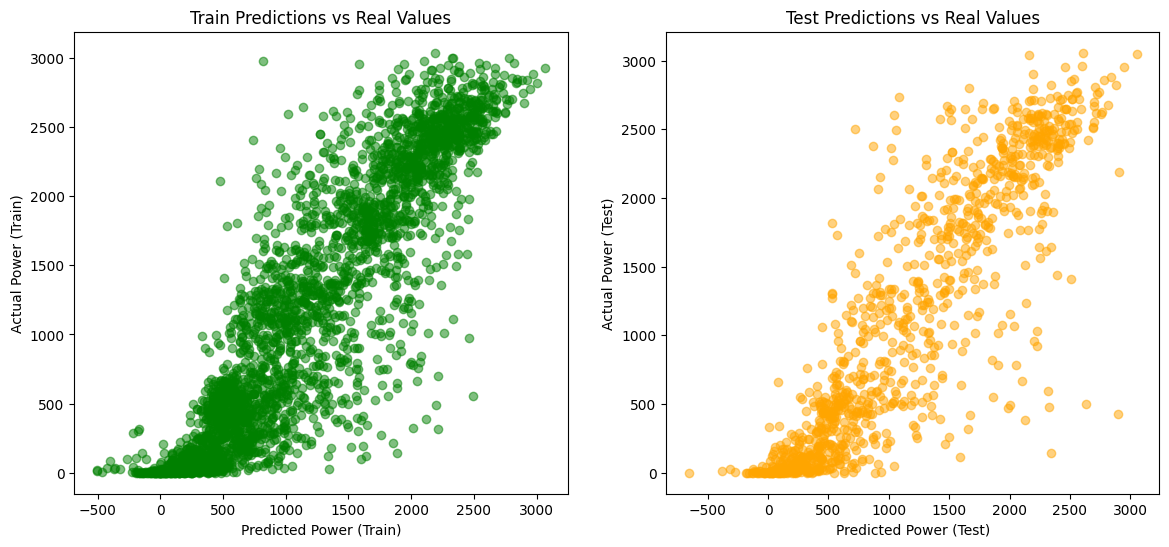

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(train_pred, y_train_orig, color='green', alpha=0.5)
plt.xlabel('Predicted Power (Train)')
plt.ylabel('Actual Power (Train)')
plt.title('Train Predictions vs Real Values')

plt.subplot(1, 2, 2)
plt.scatter(test_pred, y_test_orig, color='orange', alpha=0.5)
plt.xlabel('Predicted Power (Test)')
plt.ylabel('Actual Power (Test)')
plt.title('Test Predictions vs Real Values')
plt.show()


# Benchmarking with other models

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = sc_y.inverse_transform(lr.predict(X_test).reshape(-1, 1))
lr_r2 = r2_score(y_test_orig, lr_pred)
print(f'Linear Regression R²: {lr_r2}')

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train.ravel())
rf_pred = sc_y.inverse_transform(rf.predict(X_test).reshape(-1, 1))
rf_r2 = r2_score(y_test_orig, rf_pred)
print(f'Random Forest R²: {rf_r2}')

Linear Regression R²: 0.7061092282480099
Random Forest R²: 0.8101741979063635


# Summary of performance metrics

In [ ]:
metrics = pd.DataFrame({
    'Model': ['Neural Network', 'Linear Regression', 'Random Forest'],
    'Test RMSE': [test_rmse, np.sqrt(mean_squared_error(y_test_orig, lr_pred)), np.sqrt(mean_squared_error(y_test_orig, rf_pred))],
    'Test R²': [test_r2, lr_r2, rf_r2]
})
print(metrics)

               Model   Test RMSE   Test R²
0     Neural Network  446.082284  0.777808
1  Linear Regression  513.031532  0.706109
2      Random Forest  412.314593  0.810174


# Visualization of predictions vs Solar Azimuth

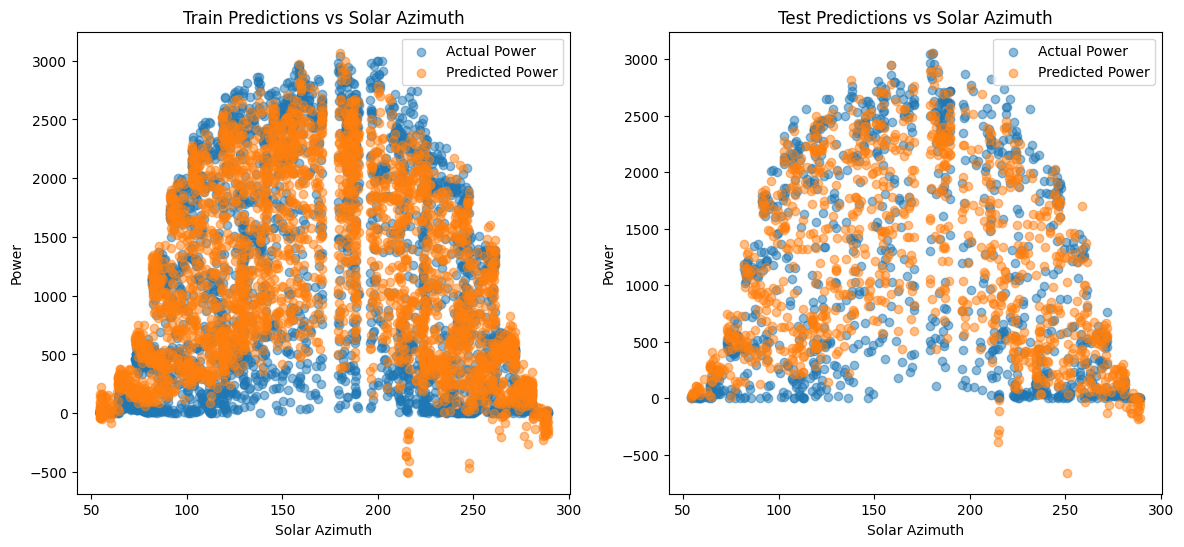

In [ ]:
x_axis_train = sc_X.inverse_transform(X_train)[:, -1]
x_axis_test = sc_X.inverse_transform(X_test)[:, -1]

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(x_axis_train, y_train_orig, label='Actual Power', alpha=0.5)
plt.scatter(x_axis_train, train_pred, label='Predicted Power', alpha=0.5)
plt.title('Train Predictions vs Solar Azimuth')
plt.xlabel('Solar Azimuth')
plt.ylabel('Power')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x_axis_test, y_test_orig, label='Actual Power', alpha=0.5)
plt.scatter(x_axis_test, test_pred, label='Predicted Power', alpha=0.5)
plt.title('Test Predictions vs Solar Azimuth')
plt.xlabel('Solar Azimuth')
plt.ylabel('Power')
plt.legend()

plt.show()

# Current day power predicting

In [ ]:
# Define prediction function
def predict_power_generation(sc_X, sc_y, spfnet):
    print("Please enter the current day's main 5 parameters (normalized values):")

    # Taking user inputs for the main 5 parameters
    temperature_2_m_above_gnd = float(input("Enter temperature_2_m_above_gnd (°C): "))
    solar_irradiance = float(input("Enter solar_irradiance (W/m²): "))
    wind_speed_10_m = float(input("Enter wind_speed_10_m (m/s): "))
    relative_humidity_2_m = float(input("Enter relative_humidity_2_m (%): "))
    pressure = float(input("Enter pressure (hPa): "))

    # Create input with only the first 5 features, padded with zeros
    user_input = np.zeros((1, X_train.shape[1]))  # Create zero-filled input matching trained data shape
    user_input[0, :5] = [temperature_2_m_above_gnd, solar_irradiance, wind_speed_10_m,
                         relative_humidity_2_m, pressure]

    # Scaling the input based on the training data
    user_input_scaled = sc_X.transform(user_input)

    # Predicting the power generation
    predicted_power_scaled = spfnet.predict(user_input_scaled)

    # Inversing the scaling for the predicted power
    predicted_power = sc_y.inverse_transform(predicted_power_scaled)

    print(f"Predicted Power Generation: {predicted_power[0][0]}")

# Call the function
predict_power_generation(sc_X, sc_y, spfnet)


Please enter the current day's main 5 parameters (normalized values):
Enter temperature_2_m_above_gnd (°C): 65
Enter solar_irradiance (W/m²): 55
Enter wind_speed_10_m (m/s): 52
Enter relative_humidity_2_m (%): 12
Enter pressure (hPa): 12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Power Generation: -8354.8623046875
